In [1]:
import pandas as pd
import  numpy as np
import nltk
import re
import jieba
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
# 导入数据
text_weibo = pd.read_csv(r'text_analysis_weibo.csv')
text_weibo = text_weibo.drop(['Unnamed: 0'],axis = 1)
text_weibo.head()

,标题/微博内容,点赞,转发,评论,账号昵称UID加密,粉丝数,关注数,地域
0,#高校通报教师图书馆打电话声音过大出言不逊#公道自在人心，谣言自在人心 ​​,0,0,0,a2331b38901d62d2d9a20529177ef3b3,0,22,湖北
1,转发C,0,0,0,d6dc4470f51fce93cc0cbad8abf55a75,0,33,广西
2,【#刘雨昕运动者联濛#河山覆冰雪，健儿迎冬奥[金牌]全能唱跳不设限，运动联濛开新年🇨🇳 期待...,0,0,0,372bc4782eb442b88035f920a7c1a68e,6,85,广东
3,丁程鑫//@丁程鑫后援会官博:#丁程鑫[超话]# ✨#丁程鑫 二十成金筑梦鑫世界# 大年初一...,0,0,0,6fe0d482bd3e78a3483e2a1d57f14ef2,75,1012,广东
4,诶，你们真不要脸诶。。。没资格宣传奥运。。。抵制抵制！,0,0,0,872380d71d6ee9130e8b49d331f2baa9,0,10,广东


In [22]:
# 随机选择数据集的十分之一
sample_ratio = 0.1  # 设置要采样的比例
text_weibo_sampled = text_weibo.sample(frac=sample_ratio, random_state=1)  # 随机采样

# 查看采样后的数据
text_weibo_sampled.head()

,标题/微博内容,点赞,转发,评论,账号昵称UID加密,粉丝数,关注数,地域
26247,#肖战# xz #肖战粉丝小飞侠31城公益#,0,0,0,2693c10220678f9a41cdae9c18edf34b,578,921,广东
35067,转发C,0,0,0,7e570dea5b211f69982c442f19c045c5,82,47,河南
34590,【左瑾言:11.17黄金最新走势分析，黄金日内最新操作策略建议。】黄金消息面解读：昨天晚上，...,0,0,0,9da3948d7304b268bbad57dbbfec0402,16,1,北京
16668,#第二轮双一流名单发布# 看来教育部相关负责人是外宾。你发布985、211、双一流，嘴上说...,0,0,0,91b94a79f58ba440bb8283831765c2b4,93,128,江苏
12196,烦恼就是在一堆不是很好的选择里也唯恐选错了[笑cry],0,0,0,62fe081b654ea26229727945bd6649b8,262,222,江苏


In [23]:
# 分析语料
text_w= list(text_weibo_sampled['标题/微博内容'])
text_w[:5]

['#肖战#  xz #肖战粉丝小飞侠31城公益#',
 '转发C',
 '【左瑾言:11.17黄金最新走势分析，黄金日内最新操作策略建议。】黄金消息面解读：昨天晚上，美国公布了10月生产者物价指数PPI数据，月率录得0.2%增幅，意外低于预期。而年率则从8.45回落至8%,数据再次被视为通胀可能触顶、支持美联储尽早转鸽的信号。但是昨天非美资产的表现却并不理想，和上周cpi数据后的大涨不同，多数只是冲高回落而已。一方面是市场对此有预期的原因，另一方面也是之前的资产价格涨幅已经不少了，上方空间比较有限。此外，费城联储主席哈克认为，未来几个月加息步伐将放缓，将在2023年某个时间点停止加息且维持利率高位不变。亚特兰大联储主席博斯蒂克称，美联储的政策行动有可能引发衰退，但这比高通胀根深蒂固要好。基本上坚持了美联储一贯的强势特点，语气缓和柔中带钢！ 黄金走势分析： 短线1小时方面，在金价进入到窄幅的上行通道之后，一路震荡上行，k线高点和低点不断的小幅上移，上涨结构完整，MACD指标在k线进入通道后，也是出现了持续的顶背离信号，昨天新高后，已经出现了第三段的顶背离，预示着回调需求越来越大，今天注意的是金价会没有新高，直接回调，还是说最后再走一个高点，如果今天再度走高，预计将会是最后一个高点，然后你会看到新高后，动能柱完全没有多头动能，只有零轴下方绿色能量柱的放量，届时将会开始真正的顶背离修正，k线的表现则是跌破低点1767，此位置是目前的水平支撑，跌破此也是上行结构出现破坏的标志，1小时顶背离开始修正后的初步目标预计在1745-50，到这个区间后，观察行情的反应，再做进一步操作，今日短线上逢高做空为主，上方关注1776-1782附近阻力，下方关注1767一线支撑。黄金早盘策略：建议1776轻仓空，1782加仓空，止损1786，目标1767-1755；====做外汇投资的你为何频繁亏损？====其一：逆市操作-方向反了就抗，抗了亏损就加剧，实在不行就止损，止损了方向又回来了，或是买涨的时候行情就跌，买跌的时候行情就涨，永远跟不上节奏。其二：不设置止损-就等于直接把钱扔掉，这是讲烂了，强调的不想再强调的问题了，我这人说话比较直、不喜欢拐弯抹角，一句话，如果你不止损，不管你的单子是赚是亏，再多的钱迟早有一天，到时也会玩完、亏的没地方哭。其三：频繁操作-无论单子理不理想，不负责任的老

In [11]:
stopwords = open(r'D:\Study\课程与作业\文本数据分析\stopwords.txt', encoding = 'utf-8').read()

In [24]:
# 数据预处理
def data_preprocess_chi(text):
    # 剔除符号与数字
    nonums_text = re.sub('[^\u4e00-\u9fa5]+', '', str(text))
        
    # 分词
    words = jieba.cut(nonums_text)
    
    # 去除停用词
    words = [w for w in words if w not in list(stopwords) and w!='\u200b' and w!='转发']
    
    return ' '.join(words)

text_weibo_sampled['clean_text'] = text_weibo_sampled['标题/微博内容'].apply(data_preprocess_chi)

In [25]:
# 展示预处理成果
text = list(text_weibo_sampled['clean_text'])
text[:10]

['肖战 肖战 粉丝 小飞侠 城 公益',
 '',
 '左瑾言 黄金 最新 走势 分析 黄金 日内 最新 操作 策略 建议 黄金 消息面 解读 昨天晚上 美国 公布 月 生产者 物价指数 数据 月 率 录得 增幅 意外 低于 预期 年率 回落 数据 再次 视为 通胀 可能 触顶 支持 美联储 尽早 转鸽 信号 但是 昨天 非美 资产 表现 理想 上周 数据 大涨 不同 多数 只是 冲高 回落 而已 一方面 市场 对此 预期 原因 另一方面 之前 资产 价格 涨幅 已经 不少 上方 空间 比较 有限 此外 费城 联储 主席 哈克 认为 未来 几个 月 加息 步伐 放缓 某个 时间 停止 加息 维持 利率 高位 不变 亚特兰大 联储 主席 博斯蒂克称 美联储 政策 行动 可能 引发 衰退 比高 通胀 根深蒂固 基本上 坚持 美联储 一贯 强势 特点 语气 缓和 柔中 带钢 黄金 走势 分析 短线 小时 方面 金价 进入 窄幅 上行 通道 之后 一路 震荡 上行 线 高点 低点 不断 小幅 上移 上涨 结构 完整 指标 在线 进入 通道 出现 持续 顶背离 信号 昨天 新高 已经 出现 第三段 顶背离 预示 回调 需求 越来越 今天 注意 金价 没有 新高 直接 回调 还是 最后 走 一个 高点 如果 今天 再度 走高 预计 将会 最后 一个 高点 然后 看到 新高 动能 柱 完全 没有 多头 动能 只有 零轴 下方 绿色 能量 柱 放量 届时 将会 开始 真正 顶背离 修正 线 表现 跌破 低点 位置 目前 水平 支撑 跌破 上行 结构 出现 破坏 标志 小时 顶背离 开始 修正 初步 目标 预计 这个 区间 观察 行情 反应 进一步 操作 今日 短线 上逢 空 为主 上方 关注 附近 阻力 下方 关注 一线 支撑 黄金 早盘 策略 建议 轻仓 空加 仓空 止损 目标 外汇 投资 为何 频繁 亏损 其一 逆市 操作 方向 抗抗 亏损 加剧 实在 不行 止损 止损 方向 回来 或是 买涨 时候 行情 跌 买 跌 时候 行情 涨 永远 跟不上 节奏 其二 设置 止损 等于 直接 钱 扔掉 这是 讲烂 强调 不想 强调 问题 这人 说话 比较 喜欢 拐弯抹角 一句 如果 止损 不管 单子 赚 亏 钱 迟早 一天 玩完 亏 地方 哭 其三 频繁 操作 无论 单子 理不 理想 

In [28]:
# 计算词频

# 初始化CountVectorizer
vectorizer = CountVectorizer()

# 将文本数据转换为词袋特征矩阵
X = vectorizer.fit_transform(text)

# 获取词汇表
feature_words = vectorizer.get_feature_names_out()

# 计算词频统计
word_freq = dict(zip(feature_words, X.sum(axis=0).A1))

# 排序
#sorted(word_freq.items(), key=lambda x: x[1], reverse=True)

#查看排序后的前20个最常见词汇
top_20_words = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)[:20]

top_20_words

[('发展', 6024),
 ('建设', 4660),
 ('中国', 3563),
 ('企业', 3372),
 ('市场', 3249),
 ('汽车', 2840),
 ('增长', 2658),
 ('亿元', 2452),
 ('国家', 2392),
 ('工作', 2370),
 ('经济', 2275),
 ('公司', 2260),
 ('推进', 2248),
 ('服务', 2162),
 ('项目', 2161),
 ('政策', 1988),
 ('同比', 1963),
 ('提升', 1961),
 ('新能源', 1942),
 ('我们', 1896)]

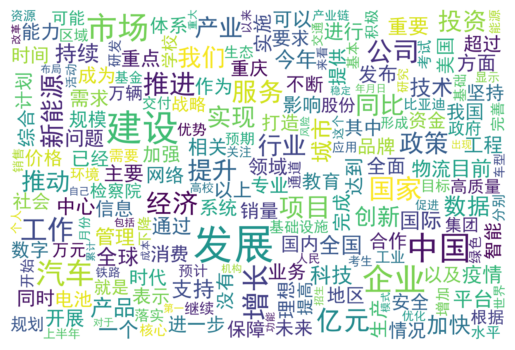

In [29]:
# 可视化词云图
wordcloud = WordCloud(
    font_path='simhei.ttf',  
    background_color='white',  
    width=1200,
    height=800,
    max_words=200,  
    max_font_size=100  
).generate_from_frequencies(word_freq)

# 显示词云图
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()